<a href="https://colab.research.google.com/github/MikeTigray/ml_projects/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv"
df = pd.read_csv(url)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Step 3: Preview the data
print(df.head())
print(df.columns)

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [6]:
# Step 4: Data Cleaning
# Remove missing or unknown genders
df_cleaned = df[df['gender'].isin(['Male', 'Female'])]


<ipython-input-6-e8ec7084152e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['num_medications'] = pd.to_numeric(df_cleaned['num_medications'], errors='coerce')


In [7]:
# Step 5: Descriptive statistics for male vs. female
grouped = df_cleaned.groupby('gender')['num_medications'].describe()
print("Descriptive Statistics:\n", grouped)

Descriptive Statistics:
           count       mean       std  min   25%   50%   75%   max
gender                                                           
Female  54708.0  16.187888  7.873664  1.0  11.0  15.0  20.0  75.0
Male    47055.0  15.828775  8.409145  1.0  10.0  14.0  20.0  81.0


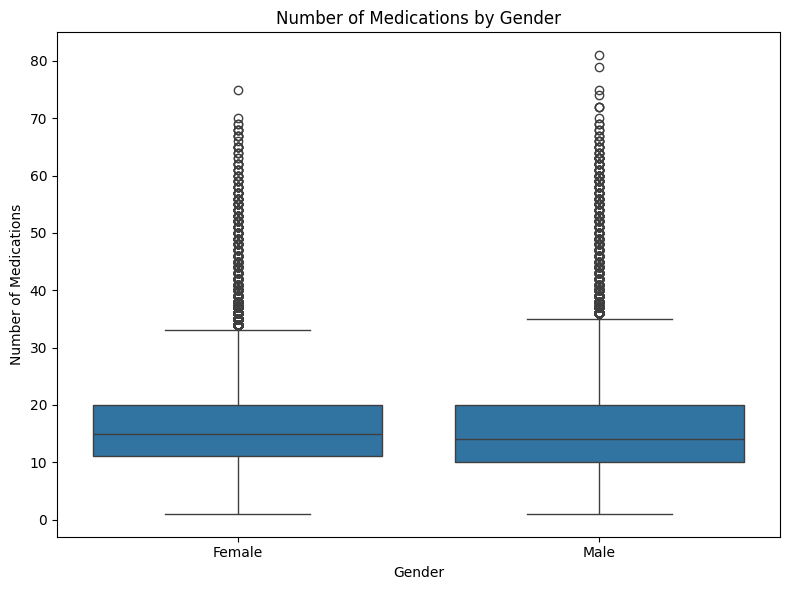

In [8]:
# Step 6: Visualization
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='num_medications', data=df_cleaned)
plt.title('Number of Medications by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medications')
plt.tight_layout()
plt.savefig('num_medications_by_gender.png')  # save image
plt.show()

Conclusion:
In this dataset, female patients tend to have a slightly higher median number of medications compared to male patients.
The variation in medication usage is wider among females. This may suggest gender-based differences in treatment plans or condition severity.